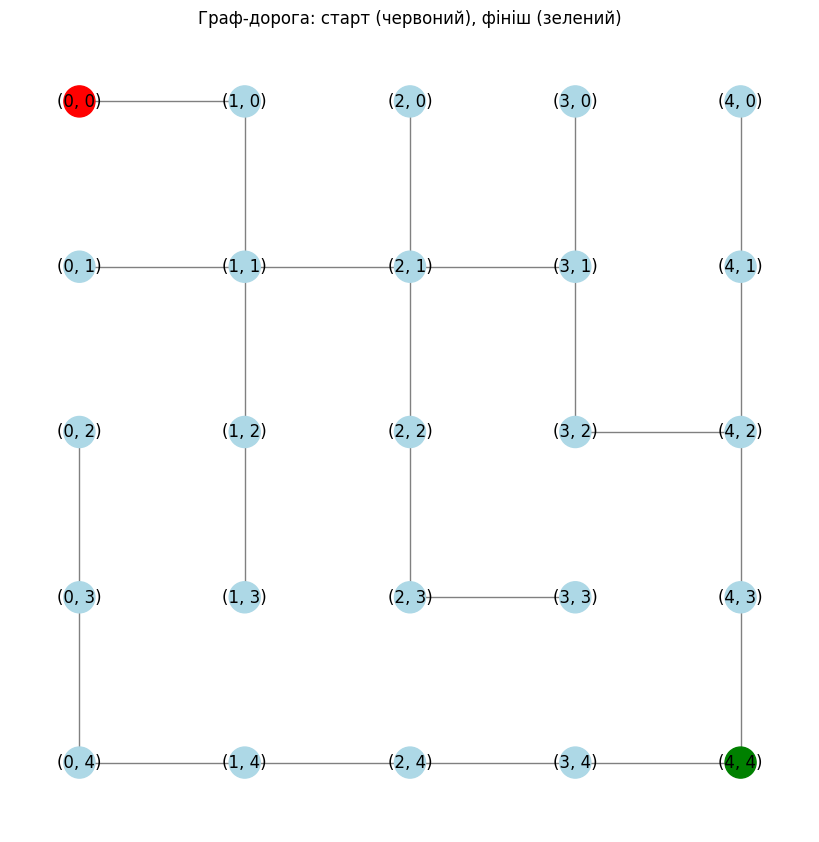

✅ Граф успішно побудовано і перевірено на зв'язність!


In [5]:
#  🧠🧠🧠 Готова лабораторна номер 1 🧠🧠🧠


# === ІМПОРТИ ТА ІНІЦІАЛІЗАЦІЯ ===
import os, random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# === ГЕНЕРАЦІЯ ТА ОЧИЩЕННЯ ГРАФА ===
def generate_graph(width, height):
    G = nx.Graph()
    for i in range(width):
        for j in range(height):
            G.add_node((i, j))
            if i > 0:
                G.add_edge((i, j), (i - 1, j))
            if j > 0:
                G.add_edge((i, j), (i, j - 1))
    return G

def remove_random_edges(G, remove_count):
    edges = list(G.edges())
    removed = 0
    for edge in random.sample(edges, len(edges)):
        if removed >= remove_count:
            break
        G.remove_edge(*edge)
        if not nx.is_connected(G):
            G.add_edge(*edge)
        else:
            removed += 1
    return G


# === ВІЗУАЛІЗАЦІЯ ===
def draw_graph(G, start, end):
    pos = {(x, y): (x, -y) for x, y in G.nodes()}
    node_colors = ["red" if node == start else "green" if node == end else "lightblue" for node in G.nodes()]
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, edge_color="gray")
    plt.title("Граф-дорога: старт (червоний), фініш (зелений)")
    plt.show()


# === ТЕСТУВАННЯ ===
def test_graph():
    width, height = 5, 5
    start, end = (0, 0), (4, 4)
    G = generate_graph(width, height)
    G = remove_random_edges(G, 20)
    assert nx.has_path(G, start, end), "❌ Немає шляху між стартом і фінішем!"
    draw_graph(G, start, end)
    print("✅ Граф успішно побудовано і перевірено на зв'язність!")


# === ЗАПУСК ===
test_graph()
